Q1

importing libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt


sigmoid funtion

In [23]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

Generating data set

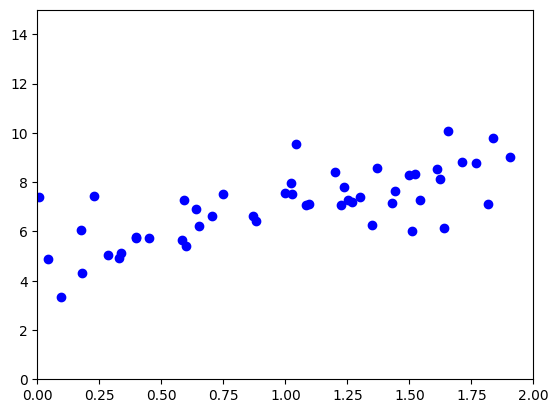

In [60]:
rng=np.random.RandomState(10)
x=2*rng.rand(50)
y=5+2*x+rng.randn(50)
m=x.shape[0] 

plt.plot(x,y,"bo")
plt.xlim(0,2)
plt.ylim(0,15)
plt.show()

COST FUNCTIONS

1

In [61]:
def cost1(x_hat, x):
    cf1=(abs((x_hat-x))**3)/2
    cff1=cf1.mean()
    return cff1

2

In [62]:
def cost2(y_out,y):
    cf2=(abs((y-y_out)**7)/2)
    cff2=cf2.mean()
    return cff2

linear function

In [63]:
def linear_function(y,w,b):
    return w*y+b

hypothesis 2

In [64]:
def hyp2(a,c,x):
    return a*(np.log(x))+c


gradient descent

1

In [65]:
def gradient_descent_1(y, x, w, b, learning_rate):
    x_hat = linear_function(y, w, b)
    
    dw = (3.0 / (2 * m)) * np.sum(np.multiply(y,np.multiply(abs(x_hat - x),(x_hat - x))))
    db = (3.0 / (2 * m)) * np.sum(np.multiply(abs(x_hat - x),(x_hat - x)))
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b


2

In [66]:
def gd2(x,y,a,c,learning_rate,m):
    y_out=hyp2(a,c,x)
    x_log=np.log(x)
    da=(7/(2*m))*np.sum(np.multiply(np.multiply(abs(y-y_out)**5,(y-y_out)),-x_log))
    
    dc=(7/(2*m))*np.sum(np.multiply(np.multiply((abs(y-y_out)**5),(y-y_out)),-1))
    a=a-learning_rate*da
    
    c=c-learning_rate*dc
    
    return a,c


implementation

1

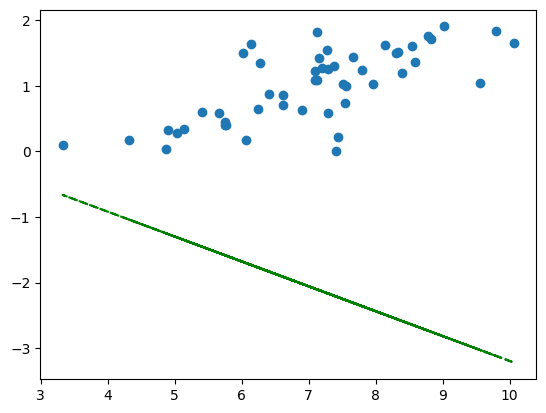

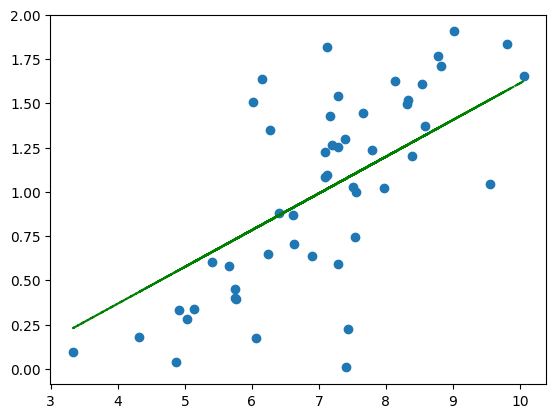

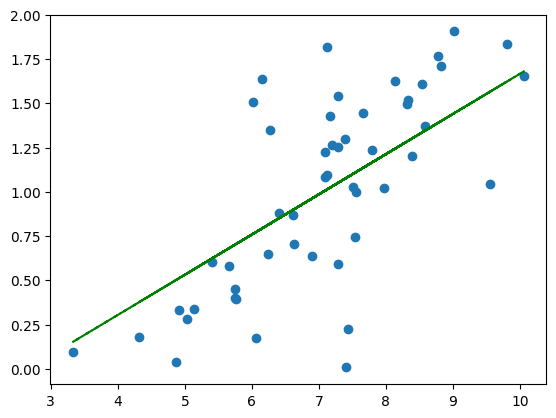

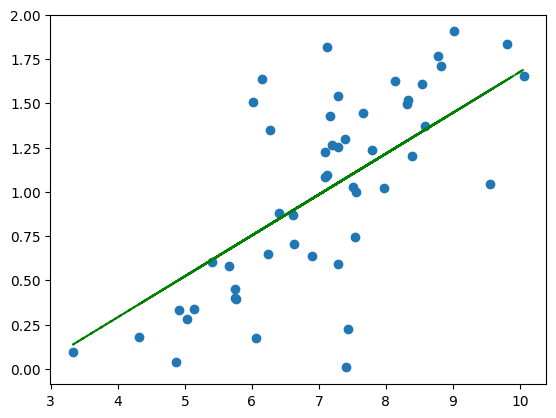

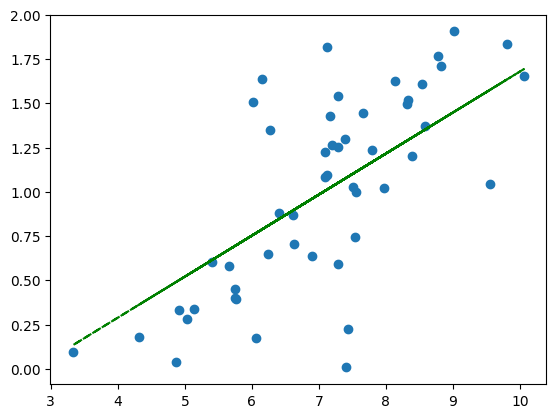

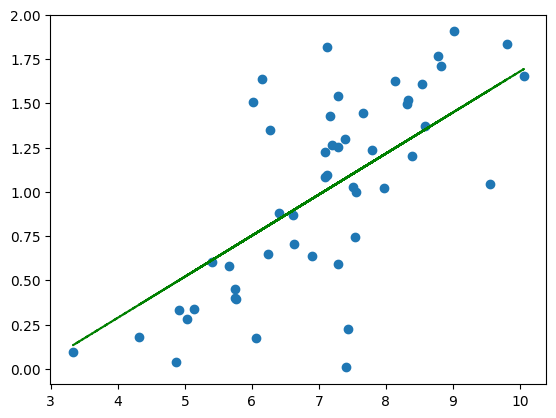

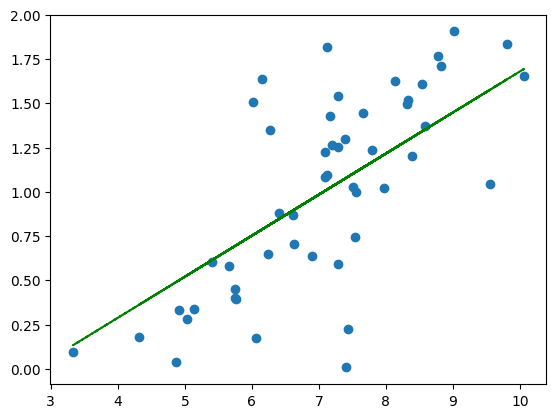

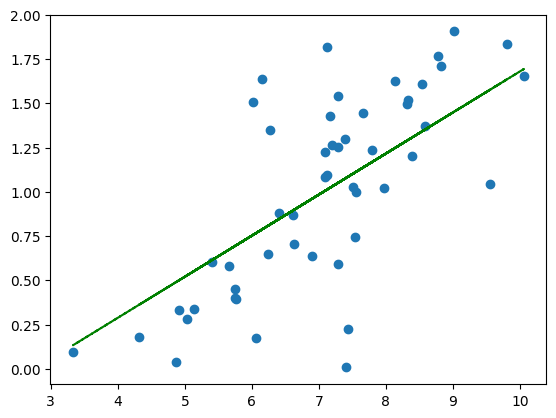

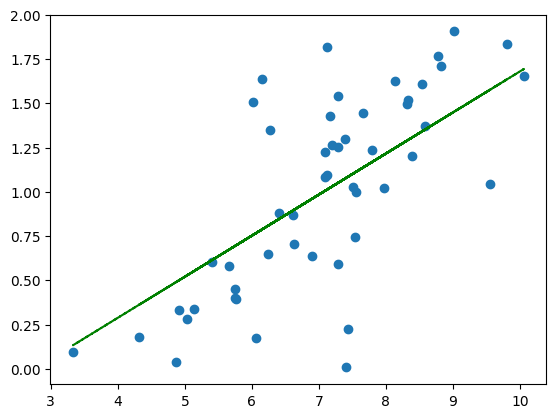

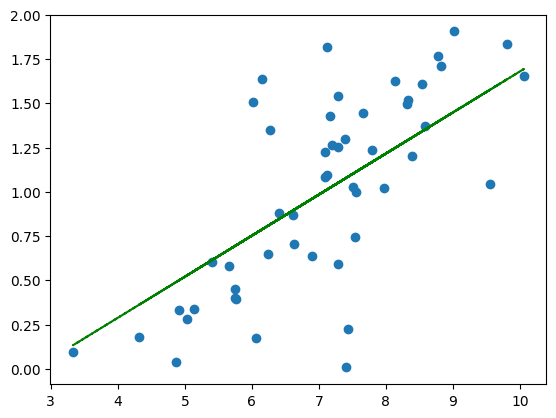

In [72]:
# Random Initialization
w = np.random.randn(1)
b = np.random.randn(1)

# Hyperparameters
learning_rate = 0.0006
num_epochs = 1000000

# Training loop
L= []
for i in range(num_epochs):
    w, b = gradient_descent_1(y, x, w, b, learning_rate)
    x_hat = linear_function(y, w, b)
    l= cost1(x_hat, x)
    L.append(l)

    if (i % (num_epochs / 10)) == 0:
        plt.scatter(y, x, label='Data')
        plt.plot(y, x_hat, 'g--', label='Regression Line')
        plt.show()


result

1

value of w: [0.232064]
value of b: [-0.63951064]
line: x=[0.232064]y+[-0.63951064]


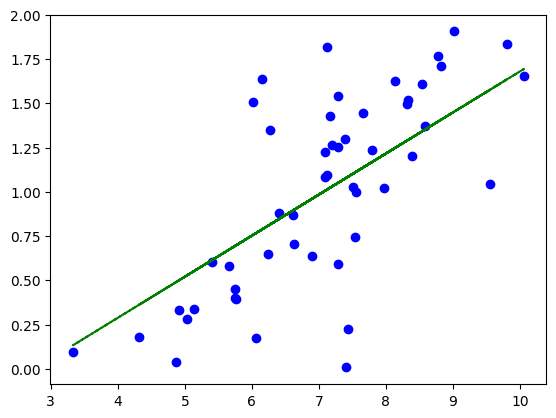

In [74]:
print(f"value of w: {w}")
print(f"value of b: {b}")
print(f"line: x={w}y+{b}")
plt.plot(y,x,'bo')
plt.plot(y,x_hat,'g--')
plt.show()

implementation 2 polynomial func

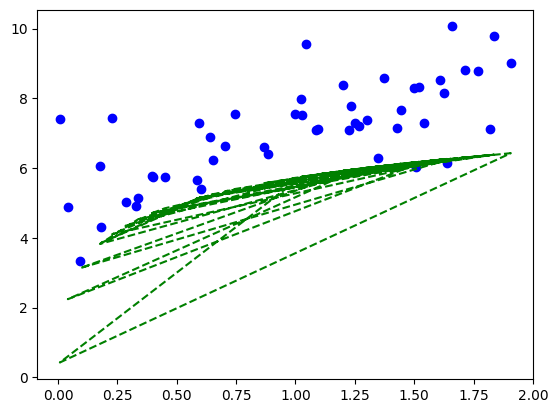

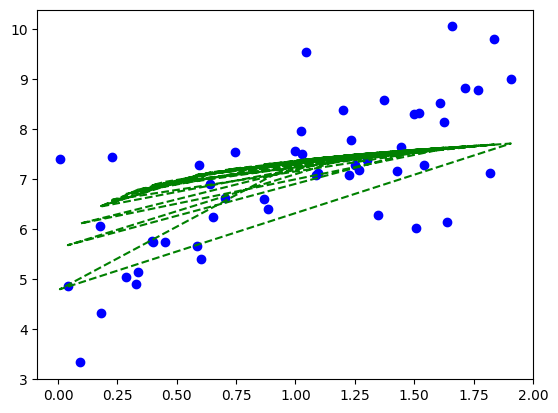

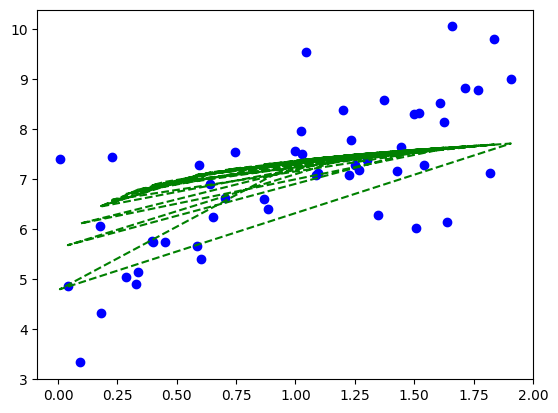

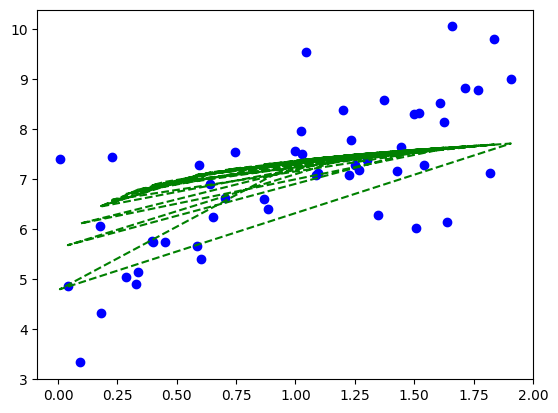

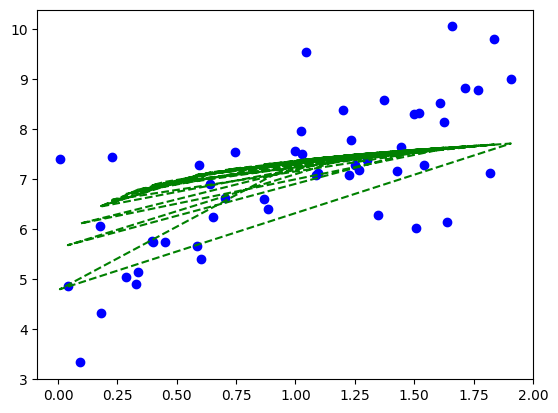

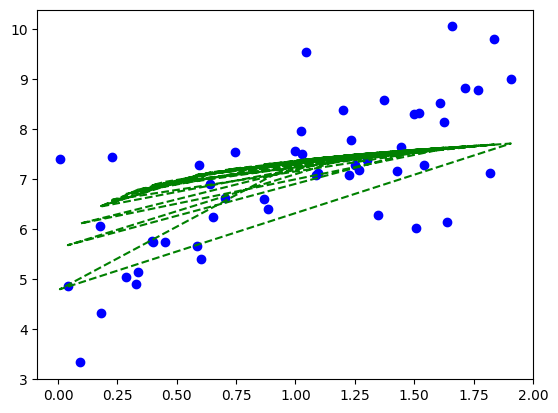

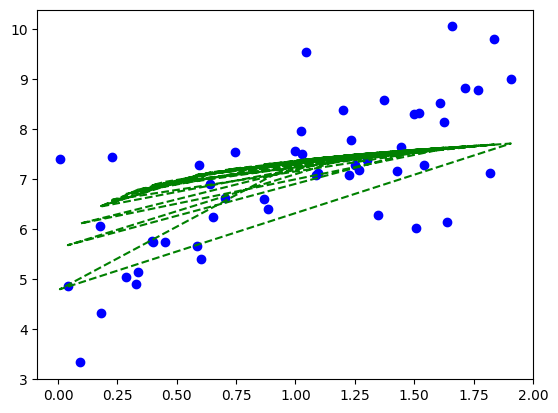

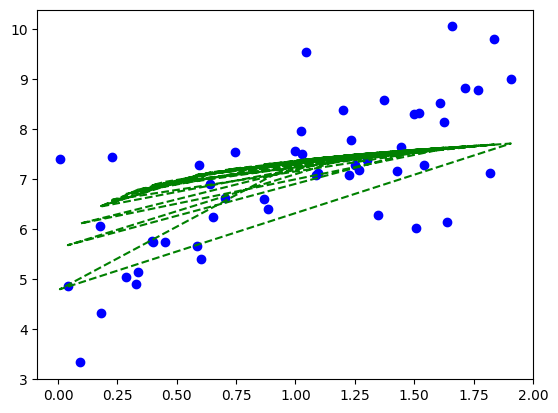

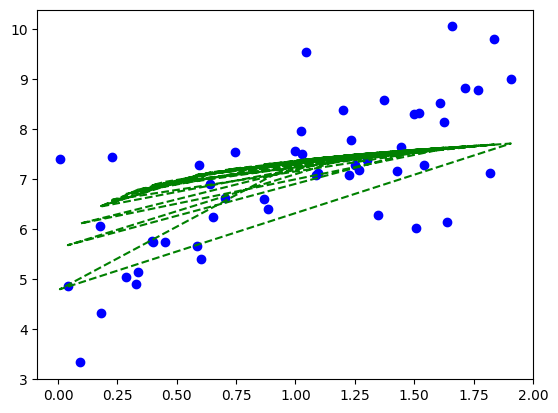

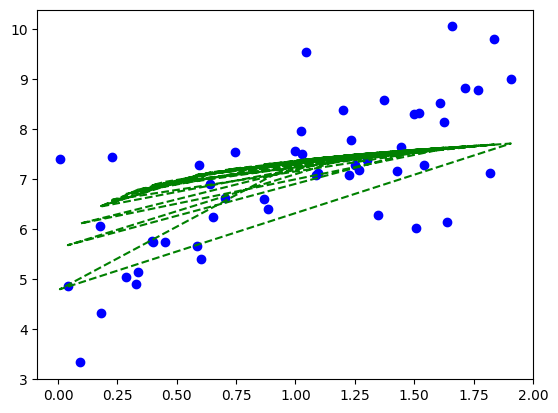

In [71]:
a=np.random.randn(1)
B=np.random.randn(1)
c=np.random.randn(1)
d=np.random.randn(1)

learning_rate=0.000005
noche=1000000

L1=[]


for i in range(noche):
    a,c= gd2(x,y,a,c,learning_rate,m)
    y_out=hyp2(a,c,x)
    L1.append(cost2(y_out,y))
    
    if (i%(noche/10))==0:
        plt.plot(x,y,'bo')
        plt.plot(x,y_out,'g--')
        plt.show()
       

result 2

value of a: [0.53179631]
value of c: [7.37264771]
line: x=[0.53179631]y+[7.37264771]


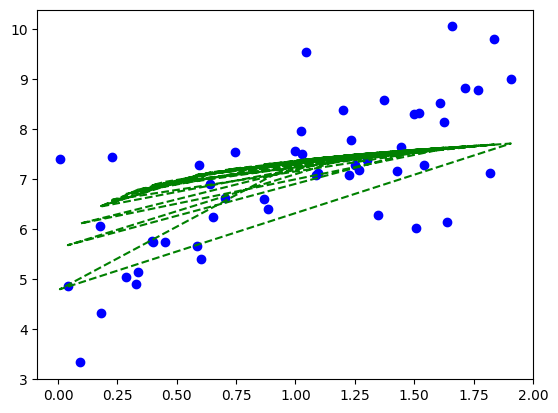

In [75]:
print(f"value of a: {a}")
print(f"value of c: {c}")
print(f"line: x={a}y+{c}")
plt.plot(x,y,'bo')
plt.plot(x,y_out,'g--')
plt.show()

cost function v/s no. of iterations 

1

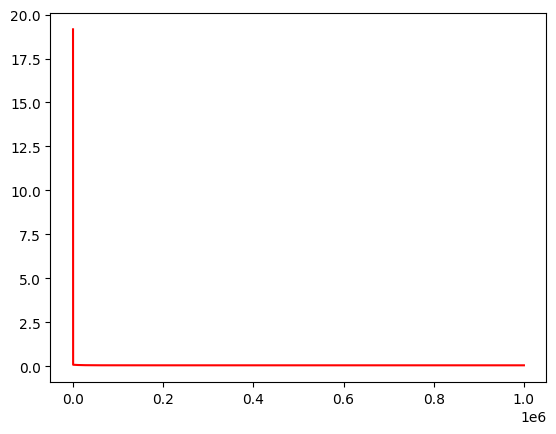

In [76]:
plt.plot(L,'r')
plt.show()

2

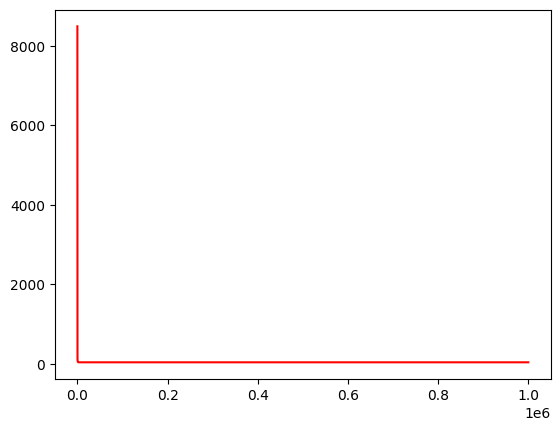

In [77]:
plt.plot(L1,'r')
plt.show()

In [64]:
def accuracy(x,x_hat):
    total_sq = np.sum((x-np.mean(x))**2)
    res=np.sum((x-x_hat)**2)
    r2 =1-(res/total_sq)
    return r2
x_pred_custom_lin=np.multiply(y,w)+b
r2_custom_lin=accuracy(x,x_pred_custom_lin)
r2_custom_lin

0.9901533755252291